https://proglib.io/p/generativno-sostyazatelnaya-neyroset-vasha-pervaya-gan-model-na-pytorch-2020-08-11

#### Общая структура GAN

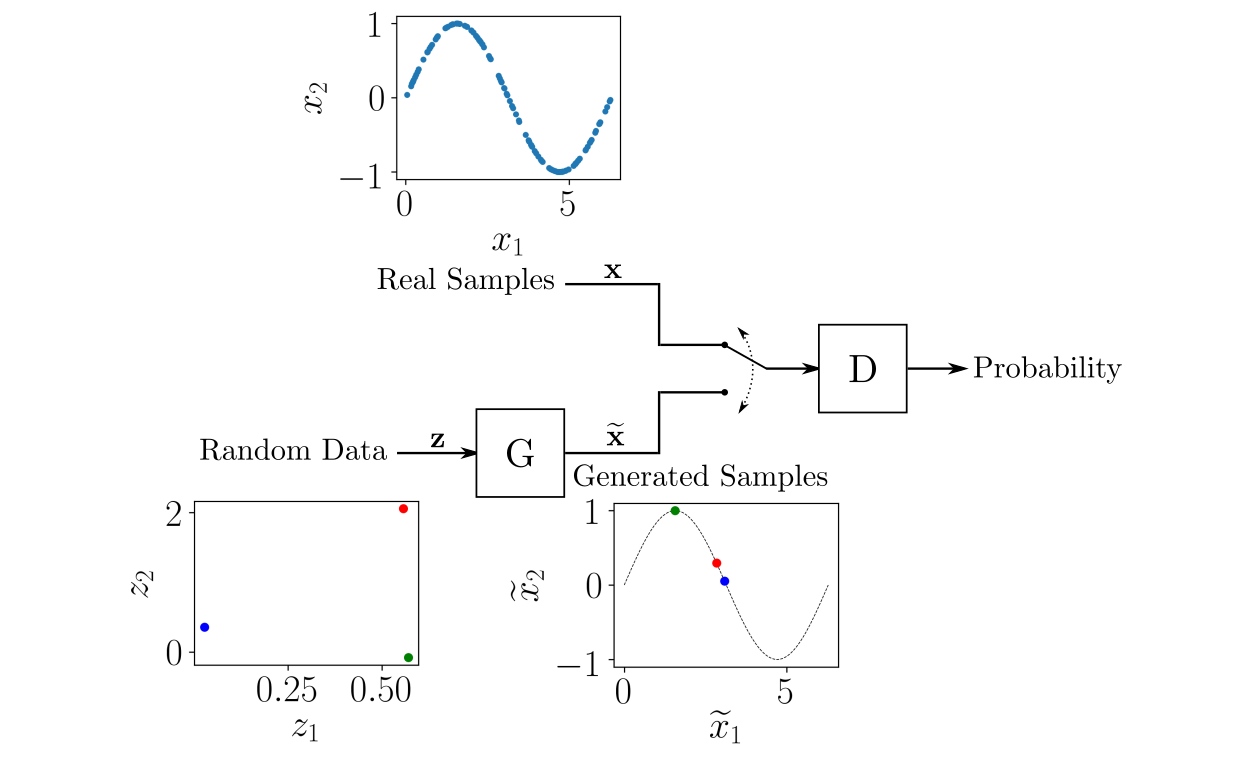

In [1]:
import torch
from torch import nn

import math
import matplotlib.pyplot as plt

In [35]:
import numpy as np

In [2]:
torch.manual_seed(111)

### Подготовка данных для обучения GAN

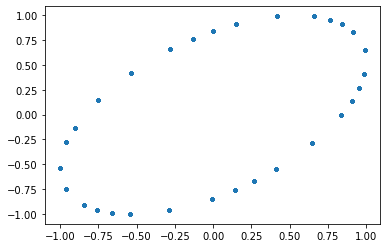

In [209]:
train_data_length = 1024
sequence_lenght = 10
train_data = torch.zeros((train_data_length, sequence_lenght))
for example in range(train_data_length):
    start_point = np.random.randint(0, 30)
    for point in range(start_point, sequence_lenght + start_point):
        train_data[example, point - start_point] = math.sin(point)
#train_data[:, sequence_lenght-1]
train_labels = torch.zeros(train_data_length)
train_set = [(train_data[i], train_labels[i]) for i in range(train_data_length)]
plt.plot(train_data[:, 0], train_data[:, 1], ".")

In [210]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True)

### Реализация дискриминатора GAN

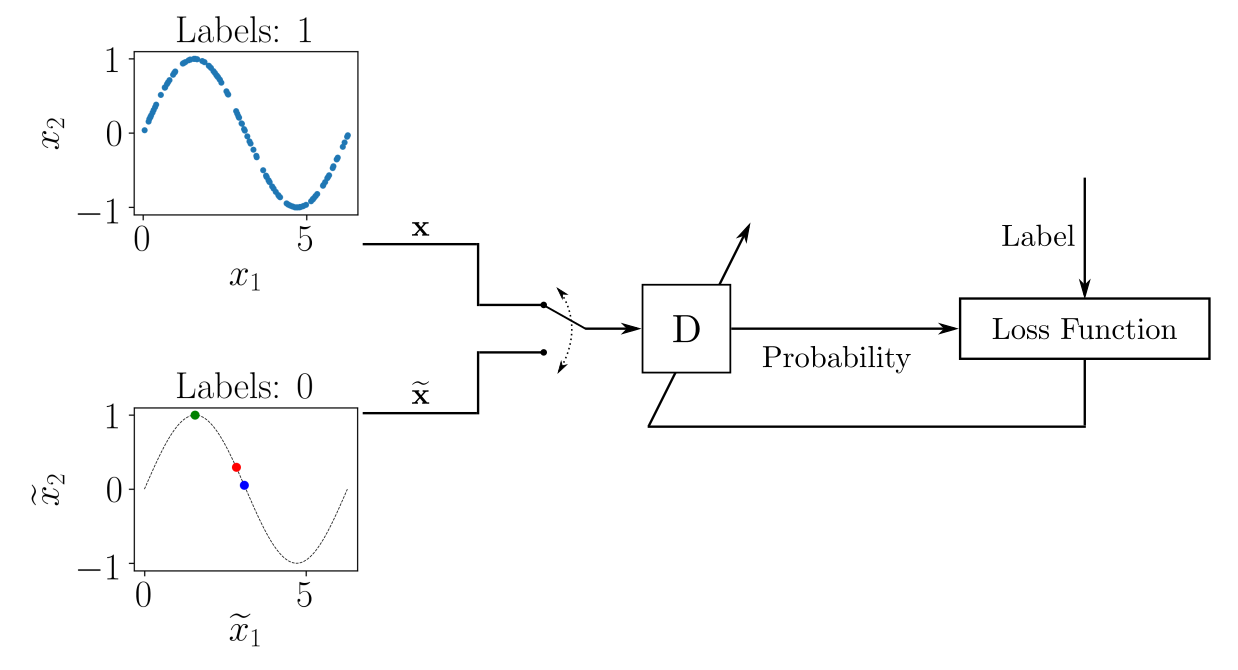

In [211]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(sequence_lenght, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid())

    def forward(self, x):
        output = self.model(x)
        return output

In [212]:
discriminator = Discriminator()

### Реализация генератора GAN

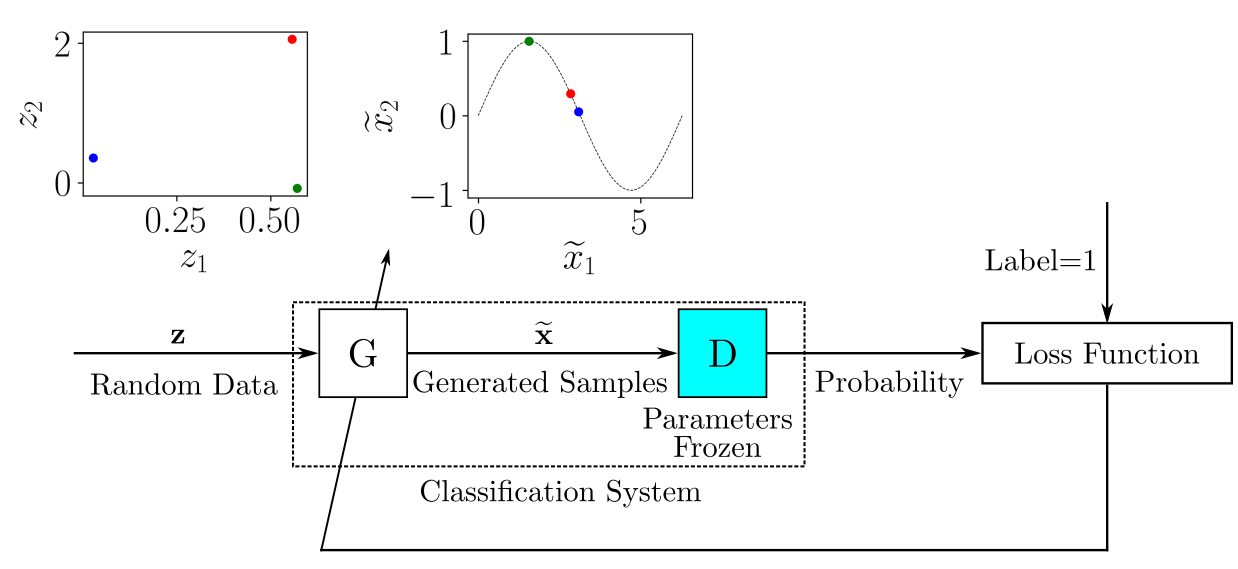

In [213]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(sequence_lenght, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, sequence_lenght))

    def forward(self, x):
        output = self.model(x)
        return output

generator = Generator()

### Обучение моделей GAN

In [214]:
lr = 0.001
num_epochs = 300
loss_function = nn.BCELoss()

In [215]:
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

#### debug ++

In [193]:
train_data_length = 1024
train_data = torch.zeros((train_data_length, 2))
train_data[:, 0] = 2 * math.pi * torch.rand(train_data_length)
train_data[:, 1] = torch.sin(train_data[:, 0])
train_labels = torch.zeros(train_data_length)
train_set = [(train_data[i], train_labels[i]) for i in range(train_data_length)]

In [200]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True)

In [221]:
for epoch in range(num_epochs):
    for n, (real_samples, _) in enumerate(train_loader):
        # Данные для обучения дискриминатора
        real_samples_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.randn((batch_size, sequence_lenght))
        break

In [202]:
print('real_samples', real_samples.size())
print('real_samples_labels', torch.ones((batch_size, 1)).size())
print('latent_space_samples', torch.randn((batch_size, 2)).size())

real_samples torch.Size([32, 2])
real_samples_labels torch.Size([32, 1])
latent_space_samples torch.Size([32, 2])


In [222]:
print('real_samples', real_samples.size())
print('real_samples_labels', torch.ones((batch_size, 1)).size())
print('latent_space_samples', torch.randn((batch_size, sequence_lenght)).size())

real_samples torch.Size([32, 10])
real_samples_labels torch.Size([32, 1])
latent_space_samples torch.Size([32, 10])


In [223]:
generated_samples = generator(latent_space_samples)

#### debug --

In [226]:
#with torch.cuda.device(0):
for epoch in range(num_epochs):
    for n, (real_samples, _) in enumerate(train_loader):
        # Данные для обучения дискриминатора
        real_samples_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.randn((batch_size, sequence_lenght))
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1))
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels))

        # Обучение дискриминатора
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # Данные для обучения генератора
        latent_space_samples = torch.randn((batch_size, sequence_lenght))

        # Обучение генератора
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels)
        loss_generator.backward()
        optimizer_generator.step()

        # Выводим значения функций потерь
        if epoch % 10 == 0 and n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")

Epoch: 0 Loss D.: 0.14590410888195038
Epoch: 0 Loss G.: 1.8271290063858032
Epoch: 10 Loss D.: 0.13298296928405762
Epoch: 10 Loss G.: 2.8256614208221436
Epoch: 20 Loss D.: 0.36916059255599976
Epoch: 20 Loss G.: 1.6213048696517944
Epoch: 30 Loss D.: 0.2703668475151062
Epoch: 30 Loss G.: 2.0140902996063232
Epoch: 40 Loss D.: 0.24119685590267181
Epoch: 40 Loss G.: 2.290240526199341
Epoch: 50 Loss D.: 0.3080114722251892
Epoch: 50 Loss G.: 1.5375423431396484
Epoch: 60 Loss D.: 0.3537495732307434
Epoch: 60 Loss G.: 1.8061671257019043
Epoch: 70 Loss D.: 0.32328009605407715
Epoch: 70 Loss G.: 1.701193928718567
Epoch: 80 Loss D.: 0.34754347801208496
Epoch: 80 Loss G.: 1.2636568546295166
Epoch: 90 Loss D.: 0.38820406794548035
Epoch: 90 Loss G.: 1.3652952909469604
Epoch: 100 Loss D.: 0.40237143635749817
Epoch: 100 Loss G.: 1.7035479545593262
Epoch: 110 Loss D.: 0.4371020197868347
Epoch: 110 Loss G.: 1.144592523574829
Epoch: 120 Loss D.: 0.6451241374015808
Epoch: 120 Loss G.: 1.3012642860412598
Epo

### Проверка образцов, сгенерированных GAN

In [227]:
latent_space_samples = torch.randn(100, sequence_lenght)
generated_samples = generator(latent_space_samples)

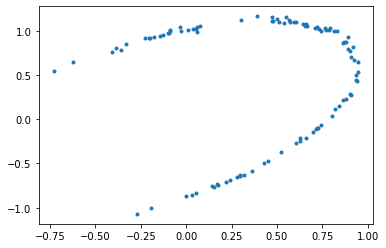

In [229]:
generated_samples = generated_samples.detach()
plt.plot(generated_samples[:, 0], generated_samples[:, 1], ".")